In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys

In [2]:
# http://hunkim.github.io/ml/   -   Linear Regression의 개념 비디오 강의슬라이드, 실습슬라이드 참고

## 단순 선형 회귀 모델

74.666664
70.98
67.386665
63.88667
60.479992
57.166668
53.946674
50.819996
47.78667
44.84666
42.0
39.246666
36.586662
34.020004
31.546667
29.166666
26.88
24.686666
22.58667
20.58
18.666666
16.846666
15.12
13.486667
11.946668
10.5
9.146666
7.886667
6.72
5.646666
4.6666665
3.78
2.986667
2.2866664
1.68
1.1666666
0.7466666
0.42000008
0.18666662
0.04666671
0.0
0.04666671
0.18666674
0.41999987
0.7466665
1.1666666
1.6800003
2.2866673
2.986666
3.7799995
4.6666665
5.646666
6.720001
7.8866653
9.146668
10.5
11.946666
13.486669
15.119998
16.84667
18.666666
20.579996
22.58667
24.686666
26.880005
29.166666
31.546661
34.020004
36.586662
39.24667
42.0
44.84666
47.786663
50.820007
53.946674
57.166668
60.479992
63.886658
67.386665
70.98


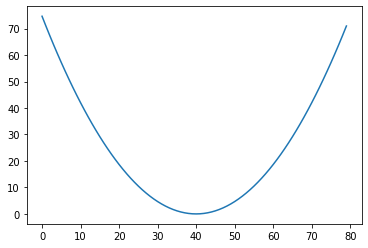

In [10]:
# 데이터 준비
x_train = [1, 2, 3] # 입력값
y_train = [1, 2, 3] # 결과값

# wx + b = y  
# x_train, y_train 값에 위의 식이 적합하려면
# w = 1, b = 0의 값이 나와야한다
# tensorflow는 이 값을 찾아줌

W = tf.placeholder(tf.float32)

# 가설 준비(Wx + b)
hypot = W * x_train # 가중치 기준으로 준비하기, b는 일단 제외시켜보자

# 비용함수 준비 # 실습슬라이드 p.7 중간식 참고
cost = tf.reduce_mean(tf.square(hypot - y_train))   
# tf.square : 제곱 / tf.reduce_mean : 전체데이터 평균 구해줌
# --------------------- 텐서플로우의 그래프 완성 --------------------- # 


# 비용함수를 그래프로 그리기
sess = tf.Session()

cost_val=[]

for i in range(-30, 50) :
    cost_result = sess.run(cost, feed_dict={W:i*0.1}) 
    # cost : 최종값만 입력하면 앞에 다 처리됨
    # feed_dict={W:i*0.1} : hypot에 입력값은 준비가 되었는데 W값은 뭔지 모름 / W에 i*0.1 씩 학습시키겠다
    
    print(cost_result) 
    # cost_result : W가 찾고자하는 비용 최저점 찾기  
    
    cost_val.append(cost_result)
    
# 그래프 
plt.plot(cost_val)
# 경사하강(Gradient Descent)
# learning rate
    
sess.close()

### 경사하강 알고리즘을 이용한 가중치 학습

In [51]:
# 데이터 준비
x_train = [1, 2, 3] # 입력값
y_train = [1, 2, 3] # 결과값

W = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="Weight")
# tf.random.normal([1]) : 랜덤값 지정 / name="Weight" : 변수 이름지정
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="bias")

# 가설 준비(기본 단순 선형 모델)
hypothesis = W * x_train + b

# 비용함수 준비 # 실습슬라이드 p.7 중간식 참고
cost = tf.reduce_mean(tf.square(hypothesis - y_train))   

# 최저비용학습을 위한 경사 하강 알고리즘(Gradient Descent Algorithm)
    # Linear Regression cost 함수 최소화 강의슬라이드 참고
    # Gradient descent algorithm(p.17) 공식
learning_rate = 0.1
gradient = tf.reduce_mean((W * x_train - y_train)*x_train)
descent = W - learning_rate * gradient
update = W.assign(descent)
# 알파값(learning_rate)은 파라미터 값, cost 줄이는 gradient 선택하기 
# tensorflow에는 같은 변수에 바로 할당(W = W.ksjfkdf)할수없어서 assign 사용

##################### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21) :
    _, c, w = sess.run([update, cost, W])
    # 제일 마지막 단계 update만 넣어주면 나머진 다 알아서 실행된다요오오오오오오옹로오
    # 근데 cost랑 W 값 궁금하니까 얘네도 return해주세요 
    #  _, c, w : update는 제외하고 c, w 값만 받아보자
    print("step : {}, cost : {}, W : {}".format(step, c, w))
    
sess.close()

step : 0, cost : 31.310312271118164, W : [-0.0237335]
step : 1, cost : 13.515498161315918, W : [0.4540088]
step : 2, cost : 7.087120056152344, W : [0.7088047]
step : 3, cost : 4.529674053192139, W : [0.84469587]
step : 4, cost : 3.4134607315063477, W : [0.9171711]
step : 5, cost : 2.888620376586914, W : [0.9558246]
step : 6, cost : 2.628751277923584, W : [0.9764398]
step : 7, cost : 2.495856523513794, W : [0.98743457]
step : 8, cost : 2.426600694656372, W : [0.9932984]
step : 9, cost : 2.3901262283325195, W : [0.9964258]
step : 10, cost : 2.3708040714263916, W : [0.9980938]
step : 11, cost : 2.3605360984802246, W : [0.9989834]
step : 12, cost : 2.3550703525543213, W : [0.9994578]
step : 13, cost : 2.352158784866333, W : [0.9997108]
step : 14, cost : 2.3506064414978027, W : [0.99984574]
step : 15, cost : 2.3497791290283203, W : [0.99991775]
step : 16, cost : 2.349337577819824, W : [0.99995613]
step : 17, cost : 2.349102258682251, W : [0.9999766]
step : 18, cost : 2.3489768505096436, W :

In [50]:
# x_train, y_train 제대로 주어지지 않은 상태에서 데이터 예측

# 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None]) # shape : 몇개 데이터 넘겨줄지 알려줘야함 / None 1차원으로 넘겨줌
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="bias")

# 가설 준비(기본 단순 선형 모델)
hypothesis = W * x_train + b

# 비용함수 준비 # 실습슬라이드 p.7 중간식 참고
cost = tf.reduce_mean(tf.square(hypothesis - y_train))   

# 최저비용학습을 위한 경사 하강 알고리즘(Gradient Descent Algorithm)
    # Linear Regression cost 함수 최소화 강의슬라이드 참고
    # Gradient descent algorithm(p.17) 공식
learning_rate = 0.1
gradient = tf.reduce_mean((W * x_train - y_train)*x_train)
descent = W - learning_rate * gradient
update = W.assign(descent)
# 알파값(learning_rate)은 파라미터 값, cost 줄이는 gradient 선택하기 
# tensorflow에는 같은 변수에 바로 할당(W = W.ksjfkdf)할수없어서 assign 사용

##################### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100) :
    _, c, w = sess.run([update, cost, W], feed_dict={x_train:[1, 2, 3, 4], y_train:[1, 2, 3, 4]}) # x_train에는 4개의 값 넘겨주기 
    # 제일 마지막 단계 update만 넣어주면 나머진 다 알아서 실행된다요오오오오오오옹로오
    # 근데 cost랑 W 값 궁금하니까 얘네도 return해주세요 
    #  _, c, w : update는 제외하고 c, w 값만 받아보자
    print("step : {}, cost : {}, W : {}".format(step, c, w))
    
sess.close()

step : 0, cost : 22.773441314697266, W : [0.69332623]
step : 1, cost : 5.273974418640137, W : [0.92333156]
step : 2, cost : 2.882951021194458, W : [0.9808329]
step : 3, cost : 2.4091854095458984, W : [0.9952082]
step : 4, cost : 2.2984933853149414, W : [0.99880207]
step : 5, cost : 2.2713046073913574, W : [0.99970055]
step : 6, cost : 2.2645373344421387, W : [0.99992514]
step : 7, cost : 2.262847900390625, W : [0.9999813]
step : 8, cost : 2.262425422668457, W : [0.99999535]
step : 9, cost : 2.262319564819336, W : [0.9999988]
step : 10, cost : 2.262293815612793, W : [0.9999997]
step : 11, cost : 2.262287139892578, W : [0.99999994]
step : 12, cost : 2.2622852325439453, W : [1.]
step : 13, cost : 2.262284755706787, W : [1.]
step : 14, cost : 2.262284755706787, W : [1.]
step : 15, cost : 2.262284755706787, W : [1.]
step : 16, cost : 2.262284755706787, W : [1.]
step : 17, cost : 2.262284755706787, W : [1.]
step : 18, cost : 2.262284755706787, W : [1.]
step : 19, cost : 2.262284755706787, W 

In [48]:
# 경사하강알고리즘 자체를 해주는 객체 사용

# 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None]) # shape : 몇개 데이터 넘겨줄지 알려줘야함 / None 1차원으로 넘겨줌
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="bias")

# 가설 준비(기본 단순 선형 모델)
hypothesis = W * x_train + b

# 비용함수 준비 # 실습슬라이드 p.7 중간식 참고
cost = tf.reduce_mean(tf.square(hypothesis - y_train))   

# 최저비용학습을 위한 경사 하강 알고리즘(Gradient Descent Algorithm)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)# minimize 에 가설 공식 넣어주면 됨

##################### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21) :
    _, c, w = sess.run([train, cost, W], feed_dict={x_train:[1, 2, 3, 4], y_train:[1, 2, 3, 4]}) # x_train에는 4개의 값 넘겨주기 
    # 제일 마지막 단계 update만 넣어주면 나머진 다 알아서 실행된다요오오오오오오옹로오
    # 근데 cost랑 W 값 궁금하니까 얘네도 return해주세요 
    #  _, c, w : update는 제외하고 c, w 값만 받아보자
    print("step : {}, cost : {}, W : {}".format(step, c, w))
    
sess.close()

step : 0, cost : 1.1947587728500366, W : [0.66248393]
step : 1, cost : 0.8296979665756226, W : [0.7123737]
step : 2, cost : 0.5763856768608093, W : [0.7539509]
step : 3, cost : 0.4006136655807495, W : [0.7886038]
step : 4, cost : 0.27864524722099304, W : [0.81748873]
step : 5, cost : 0.19400988519191742, W : [0.84156895]
step : 6, cost : 0.13527919352054596, W : [0.8616468]
step : 7, cost : 0.09452325850725174, W : [0.87839055]
step : 8, cost : 0.06623974442481995, W : [0.8923571]
step : 9, cost : 0.04661041498184204, W : [0.9040101]
step : 10, cost : 0.03298626095056534, W : [0.913736]
step : 11, cost : 0.023528777062892914, W : [0.9218564]
step : 12, cost : 0.016962707042694092, W : [0.92863953]
step : 13, cost : 0.012402765452861786, W : [0.9343086]
step : 14, cost : 0.009234962053596973, W : [0.93904954]
step : 15, cost : 0.007033143192529678, W : [0.9430174]
step : 16, cost : 0.005501613020896912, W : [0.9463412]
step : 17, cost : 0.004435183946043253, W : [0.94912845]
step : 18, 

In [65]:
# 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None]) # shape : 몇개 데이터 넘겨줄지 알려줘야함 / None 1차원으로 넘겨줌
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="bias")

# 가설 준비(기본 단순 선형 모델)
hypothesis = W * x_train + b

# 비용함수 준비 # 실습슬라이드 p.7 중간식 참고
cost = tf.reduce_mean(tf.square(hypothesis - y_train))   

# 최저비용학습을 위한 경사 하강 알고리즘(Gradient Descent Algorithm)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost) # minimize 에 가설 공식 넣어주면 됨

##################### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000) :
    _, curr_c, curr_w, curr_b = sess.run([train, cost, W, b], feed_dict={x_train:[1, 2, 3, 4, 5],
                                                    y_train:[2.1, 3.1, 4.1, 5.1, 6.1]}) # x_train에는 4개의 값 넘겨주기 
    
    if step % 100 == 0: # 2000번 너무 많으니까 걍 100번에 한번 찍히도록
        print("step : {}, cost : {}, W : {}, bias : {}".format(step, curr_c, curr_w, curr_b))
        
# session 계속 훈련시키기

step : 0, cost : 9.969096183776855, W : [0.3778319], bias : [0.7219428]
step : 100, cost : 0.003398333443328738, W : [1.037719], bias : [0.9638223]
step : 200, cost : 0.0017262387555092573, W : [1.026883], bias : [1.0029436]
step : 300, cost : 0.0008768863044679165, W : [1.01916], bias : [1.030826]
step : 400, cost : 0.00044543101103045046, W : [1.0136558], bias : [1.0506982]
step : 500, cost : 0.000226268355618231, W : [1.0097327], bias : [1.0648613]
step : 600, cost : 0.0001149408271885477, W : [1.0069369], bias : [1.0749557]
step : 700, cost : 5.838323340867646e-05, W : [1.0049438], bias : [1.0821508]
step : 800, cost : 2.9657454433618113e-05, W : [1.0035236], bias : [1.0872784]
step : 900, cost : 1.5063315004226752e-05, W : [1.0025114], bias : [1.0909333]
step : 1000, cost : 7.651731721125543e-06, W : [1.0017899], bias : [1.0935379]
step : 1100, cost : 3.8863063309690915e-06, W : [1.0012757], bias : [1.0953946]
step : 1200, cost : 1.9740641619137023e-06, W : [1.0009092], bias : [1.

In [66]:
# testing
print(sess.run(hypothesis, feed_dict={x_train:[27]}))
print(sess.run(hypothesis, feed_dict={x_train:[2.5, 3.7]}))

sess.close()

[28.101427]
[3.5999317 4.800005 ]


In [157]:
# 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측하시오.
x_data = [1, 2, 3, 4, 5, 6, 7] # 7시간 일했을때까지
y_data = [25000, 55000, 75000, 110000, 128000, 155000, 180000] # 각각의 매출액이 얼마인가

X = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="bias")

hypo = W * X + b

cost = tf.reduce_mean(tf.square(hypo - y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10000) :
    _, curr_h, curr_c = sess.run([train, hypo, cost], feed_dict={X:x_data, y:y_data})
    
    if step % 500 == 0:        
        print("step : {}, hypothesis : {}, cost : {}".format(step, curr_h, curr_c))

step : 0, hypothesis : [-0.7621369 -0.918597  -1.0750571 -1.2315173 -1.3879775 -1.5444376
 -1.7008977], cost : 13455145984.0
step : 500, hypothesis : [ 29443.41   54486.055  79528.7   104571.34  129613.984 154656.64
 179699.28 ], cost : 10400110.0
step : 1000, hypothesis : [ 29028.521  54176.156  79323.8   104471.42  129619.06  154766.7
 179914.33 ], cost : 9835889.0
step : 1500, hypothesis : [ 28686.2    53920.453  79154.71  104388.96  129623.21  154857.47
 180091.72 ], cost : 9451773.0
step : 2000, hypothesis : [ 28403.76  53709.48  79015.2  104320.92 129626.64 154932.38 180238.1 ], cost : 9190289.0
step : 2500, hypothesis : [ 28170.723  53535.406  78900.086 104264.77  129629.46  154994.14
 180358.83 ], cost : 9012278.0
step : 3000, hypothesis : [ 27978.453  53391.785  78805.12  104218.445 129631.77  155045.12
 180458.45 ], cost : 8891104.0
step : 3500, hypothesis : [ 27819.82   53273.293  78726.766 104180.24  129633.72  155087.19
 180540.67 ], cost : 8808604.0
step : 4000, hypothesi

In [159]:
# 8시간 일했을 때의 매출액 알기
print(sess.run(hypo, feed_dict={X:[8]}))

sess.close()

[206523.78]


### 다중 선형 회귀모델

In [ ]:
# 여러개의 입력의 Linear Regression  강의슬라이드, lab슬라이드 참고

In [93]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

In [94]:
# 단순하게 처리하는 경우

X1 = tf.placeholder(tf.float32, shape=[None])
X2 = tf.placeholder(tf.float32, shape=[None])
X3 = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

W1 = tf.Variable(tf.random_normal([1]))
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# 가설 설정
hypothesis = W1*X1 + W2*X2 + W3*X3 + b

# 비용함수
cost = tf.reduce_mean(tf.square(hypothesis - y))

# 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

##################### Graph 작업 완료

with tf.Session() as sess : 
    sess.run(tf.global_variables_initializer())
    for step in range(2000) :
        _, hy, co = sess.run([train, hypothesis, cost], feed_dict={X1:x1_data, X2:x2_data, X3:x3_data, y:y_data})
        if step % 100 == 0: 
            print("step : {}, cost : {}, hypothesis : {}".format(step, co, hy))
            # hypothesis 결과값이 실제 결과값 y_data 와 비슷한지 알아보기

step : 0, cost : 3160.19189453125, hypothesis : [196.37163 247.84644 238.23853 259.26968 191.8765 ]
step : 100, cost : 10.93991470336914, hypothesis : [146.71205 187.91507 179.31421 195.08775 146.11546]
step : 200, cost : 10.373735427856445, hypothesis : [146.83801 187.82875 179.35283 195.11542 146.00243]
step : 300, cost : 9.837379455566406, hypothesis : [146.96062 187.74472 179.39043 195.14233 145.89241]
step : 400, cost : 9.329366683959961, hypothesis : [147.07994 187.66295 179.42702 195.16853 145.78535]
step : 500, cost : 8.84810733795166, hypothesis : [147.19608 187.58334 179.46265 195.19398 145.68114]
step : 600, cost : 8.392243385314941, hypothesis : [147.30911 187.50586 179.4973  195.21878 145.57973]
step : 700, cost : 7.960448265075684, hypothesis : [147.41914 187.4305  179.53107 195.2429  145.48103]
step : 800, cost : 7.55142068862915, hypothesis : [147.52625 187.35712 179.56392 195.2664  145.38501]
step : 900, cost : 7.163971900939941, hypothesis : [147.63046 187.28569 179.5

In [87]:
### Matrix로 처리하는 경우

x_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

X = tf.placeholder(tf.float32, shape=[None, 3]) # ?개로 입력되서 3개로 나옴
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1])) # 위에 X에 5,3 행렬에서 가져올거 3 ([5, 3] * [3, 1])
b = tf.Variable(tf.random_normal([1])) # 마지막 y로 출력하는 개수 1 (위에 [3, 1]에서의 1)

# 가설 설정
hypothesis = tf.matmul(X, W) + b # X, W 행렬곱으로 계산하기

# 비용함수
cost = tf.reduce_mean(tf.square(hypothesis - y))

# 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

##################### Graph 작업 완료

with tf.Session() as sess : 
    sess.run(tf.global_variables_initializer())
    for step in range(2001) :
        _, hy, co = sess.run([train, hypothesis, cost], feed_dict={X:x_data, y:y_data})
        
        if step % 100 == 0: 
            print("step : {}, cost : {}, hypothesis : {}".format(step, co, hy))
            # hypothesis 결과값이 실제 결과값 y_data 와 비슷한지 알아보기

step : 0, cost : 60519.35546875, hypothesis : [[-68.44322 ]
 [-76.32652 ]
 [-78.084915]
 [-87.8255  ]
 [-54.32952 ]]
step : 100, cost : 4.92209005355835, hypothesis : [[149.90068]
 [185.97198]
 [180.43182]
 [193.69054]
 [145.70654]]
step : 200, cost : 4.732911586761475, hypothesis : [[149.9697 ]
 [185.92413]
 [180.45229]
 [193.71077]
 [145.63913]]
step : 300, cost : 4.553365707397461, hypothesis : [[150.03683]
 [185.87756]
 [180.47215]
 [193.73058]
 [145.57344]]
step : 400, cost : 4.3830342292785645, hypothesis : [[150.10211]
 [185.83228]
 [180.49146]
 [193.74994]
 [145.50945]]
step : 500, cost : 4.221369743347168, hypothesis : [[150.16557]
 [185.78821]
 [180.5102 ]
 [193.7689 ]
 [145.44708]]
step : 600, cost : 4.0679030418396, hypothesis : [[150.22726]
 [185.74535]
 [180.52838]
 [193.78746]
 [145.38628]]
step : 700, cost : 3.922281265258789, hypothesis : [[150.28728]
 [185.70369]
 [180.5461 ]
 [193.80565]
 [145.32707]]
step : 800, cost : 3.784053087234497, hypothesis : [[150.3456 ]
 [

## DASK
    - 가상 데이터프레임
    - 병렬처리용 작업 스케줄러

In [97]:
# 파일 생성 & 저장

%%writefile "data/sample1.csv"
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing data/sample1.csv


In [101]:
# 파일 가져오기

df1 = pd.read_csv("data/sample1.csv")
df1 # 자동적으로 dataframe형식으로 가져옴 


df1[" c2"].mean() # 컬럼이름앞에 공백있음

2.22

In [103]:
# dask를 이용해보자
import dask.dataframe as dd

df2 = dd.read_csv("data/sample1.csv")
df2 # 실제 데이터 값은 안올라오고 틀만 나타남 / Dask Name: from-delayed, 3 tasks : 데이터를 한번에 불러오고있지 않고있어요...

,c1,c2,c3
npartitions=1,,,
,int64,float64,object
,...,...,...


In [105]:
df2.head() # 필요할때 데이터를 가져와서 쓸수있게끔 해줘요...

C:\Users\acorn\AppData\Local\Continuum\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:5916: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [109]:
df2[" c2"].mean() # 객체는 생성되어있는데 값이 보이진 않아요...
df2[" c2"].mean().compute() # 값을 보고싶다면 compute!!!

2.22

In [111]:
df3 = dd.read_csv("data/crime.csv", dtype=str, error_bad_lines=False, warn_bad_lines=False) 

In [116]:
df3
df3.tail()
df3.count().compute() # 전체데이터 개수 확인

[########################################] | 100% Completed |  0.9s
[########################################] | 100% Completed |  1.0s


ID                            171179
Case Number                   171179
Date                          171179
Block                         171179
IUCR                          171179
Primary Type                  171179
Description                   171179
Location Description          170591
Arrest                        171179
Domestic                      171179
Beat                          171178
District                      171178
Ward                          171171
Community Area                171178
FBI Code                      171178
X Coordinate                  170221
Y Coordinate                  170221
Year                          171178
Updated On                    171178
Latitude                      170221
Longitude                     170221
Location                      170221
Historical Wards 2003-2015    169683
Zip Codes                     170221
Community Areas               169754
Census Tracts                 169770
Wards                         169755
B

In [117]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [118]:
%%time
df3.count().compute()

[########################################] | 100% Completed |  1.3s
[########################################] | 100% Completed |  1.4s
Wall time: 1.45 s


ID                            228750
Case Number                   228750
Date                          228750
Block                         228750
IUCR                          228750
Primary Type                  228750
Description                   228749
Location Description          227938
Arrest                        228749
Domestic                      228749
Beat                          228749
District                      228749
Ward                          228742
Community Area                228748
FBI Code                      228749
X Coordinate                  226295
Y Coordinate                  226295
Year                          228749
Updated On                    228749
Latitude                      226295
Longitude                     226295
Location                      226295
Historical Wards 2003-2015    225562
Zip Codes                     226295
Community Areas               225654
Census Tracts                 225696
Wards                         225656
B

In [119]:
%%time
df3.count().compute(scheduler="processes", num_workers=4)

[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
Wall time: 2.25 s


ID                            241329
Case Number                   241329
Date                          241329
Block                         241329
IUCR                          241329
Primary Type                  241329
Description                   241329
Location Description          240475
Arrest                        241329
Domestic                      241329
Beat                          241329
District                      241329
Ward                          241321
Community Area                241328
FBI Code                      241329
X Coordinate                  238643
Y Coordinate                  238643
Year                          241329
Updated On                    241329
Latitude                      238643
Longitude                     238643
Location                      238643
Historical Wards 2003-2015    237868
Zip Codes                     238643
Community Areas               237965
Census Tracts                 238014
Wards                         237967
B

In [121]:
(df2["c1"] * 3).compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s


0    3
1    6
2    9
Name: c1, dtype: int64

In [122]:
df2 = df2.assign(c1=df2["c1"]-3)

In [123]:
df2.head()

[########################################] | 100% Completed |  0.1s


C:\Users\acorn\AppData\Local\Continuum\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:5916: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


[########################################] | 100% Completed |  0.2s


,c1,c2,c3
0,-2,1.11,one
1,-1,2.22,two
2,0,3.33,three


In [126]:
# 새로운 컬럼 추가
df2 = df2.assign(title=df2["c1"].astype(str) + "%")
df2.head()

[########################################] | 100% Completed |  0.1s


C:\Users\acorn\AppData\Local\Continuum\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:5916: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


[########################################] | 100% Completed |  0.2s


,c1,c2,c3,title
0,-2,1.11,one,-2%
1,-1,2.22,two,-1%
2,0,3.33,three,0%


In [ ]:
# 복수 데이터

In [127]:
%%writefile 'data/sample2.csv'
c1, c2, c3
4, 4.11, one
5, 5.22, two
6, 6.33, three

Writing data/sample2.csv


In [128]:
# 복수데이터
df4 = dd.read_csv("data/sample*.csv")
df4.count().compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s


c1     6
 c2    6
 c3    6
dtype: int64

## Queue Runner

In [135]:
filename_queue = tf.train.string_input_producer(["data/data-01-test-score1.csv"])
key, value = tf.TextLineReader().read(filename_queue)
xy = tf.decode_csv(value, record_defaults=[[0,], [0,], [0,], [0,]])

In [136]:
xy

[<tf.Tensor 'DecodeCSV_1:0' shape=() dtype=int32>,
 <tf.Tensor 'DecodeCSV_1:1' shape=() dtype=int32>,
 <tf.Tensor 'DecodeCSV_1:2' shape=() dtype=int32>,
 <tf.Tensor 'DecodeCSV_1:3' shape=() dtype=int32>]

### tf.train.batch

    - Batch : 전체 데이터 일괄처리 (메모리 충분할시에 사용)
    - Stochastic : 한개의 데이터
    - Mini Batch : Batch와 Stochastic의 절충안 (적당한 개수 지정)
    
    + epoch : 전체 셋에 대해 한 번 학습을 완료한 상태

In [146]:
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10) 
# xy[0:-1] : 0부터 마지막까지 / 독립변수,  xy[-1:] : 뒤에서부터 / 종속변수

In [147]:
# 훈련
X = tf.placeholder(tf.float32, shape=[None, 3]) 
    # ?개의 데이터(몇개가 들어올지 모르니)가 3개의 특성으로 나누어지기
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1])) 
b = tf.Variable(tf.random_normal([1])) # W에서 출력의 개수 

# 가설
hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis-y))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [149]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    for step in range(2001) :
        x_batch, y_batch =  sess.run([train_x_batch, train_y_batch])
        sess.run(train, feed_dict={X:x_batch, y:y_batch})
        
    coord.request_stop()
    coord.join(threads)
    # thread : 프로세스 안에서 실행되는 작업 단위
    # multi thread : 동시에 여러개의 thread 실행
    # scheduling : 여러개의 thread를 어떤 순서에 의해 동시에 실행할것인지 결정하는것
    #            : 여러 thread들이 아주 짧은 시간동안 번갈아가면서 thread의 run()메소드를 조금씩 실행하는거
    # join : thread 여러개 시행될때 끝나지 않은 thread를 기다렸다가 같이 끝나게 하는 메서드
    
    print("당신의 성적은 :", sess.run(hypothesis, feed_dict={X:[[100, 70, 101]]}))
    print("다른사람의 성적은 :", sess.run(hypothesis, feed_dict={X:[[60, 70, 110], [90, 100, 80]]}))

당신의 성적은 : [[195.84616]]
다른사람의 성적은 : [[187.08548]
 [169.91528]]


### 로지스틱 회귀모델
http://hunkim.github.io/ml/lec5.pdf  logistic 강의 슬라이드 참고

Logistic Hypothesis 공식(=sigmoid 공식): H(X) = 1/(1+e^(-WX))

Cost function 공식 : C(H(x), y) = ylog(H(x)) - (1-y)log(1-H(x))

In [169]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [176]:
# 그래프 작업
X = tf.placeholder(tf.float32, shape=[None, 2]) # x_data 6개에 2개씩 묶여있으므로
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

# 가설 설정
hypothesis = tf.sigmoid(tf.matmul(X, W) + b) # 선형회귀 공식에 sigmoid 함수 감싸주기 

# 비용 함수
cost = -tf.reduce_mean(y*tf.log(hypothesis) + (1-y)*tf.log(1-hypothesis))

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [177]:
# 그래프 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(10001):
    sess.run(train, feed_dict={X:x_data, y:y_data})

In [178]:
# 정확도 검증
pred = tf.cast(hypothesis > 0.5, dtype=tf.float32) 
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, y), dtype=tf.float32))

In [180]:
h, p, a = sess.run([hypothesis, pred, accuracy], feed_dict={X:x_data, y:y_data})
print("가설 : ", h, "\n예측 :", p, "\n정확도 :", a)

가설 :  [[0.02220011]
 [0.1453554 ]
 [0.26093423]
 [0.8022406 ]
 [0.95195085]
 [0.98439515]] 
예측 : [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
정확도 : 1.0


## Softmax Classifier
softmax Regression 강의슬라이드, 실습슬라이드 참고

Sigmoid로 나온 결과값을 0과 1사이의 확률로 계산하여 제공

one-hot encoding(하나의 값에만 1의 값(ex 최대값)을 주고 나머지 다 0) 사용 가능 : 구별하기 쉬움

Cross-Entropy : 복잡함 최소화 시켜주기

In [14]:
# 데이터 준비 
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5],
          [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]] 

y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# 훈련
X = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 3])

W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))


# 가설 설정
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(train, feed_dict={X:x_data, y:y_data})
    # 훈련 종료
    
    result = sess.run(hypothesis, feed_dict={X:[[1, 11, 7, 9]]})
    print(result)
    print(sess.run(tf.arg_max(result, 1))) # 가장 큰값 꺼내기

[[0.27011934 0.72591513 0.00396553]]
[1]


### Fancy Softmax : softmax_corss_entropy_with_logits(), one_hot(), reshape()

In [19]:
# 훈련
X = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 3])

W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))

# 가설 설정
logit = tf.matmul(X, W) + b  # logit : WX + b (원초적 공식)
hypothesis = tf.nn.softmax(logit)

cost = tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y_data) 
                                                # logits= : 식이 뭐냥, labels= :정답은 뭐냥

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(train, feed_dict={X:x_data, y:y_data})
    # 훈련 종료
    
    result = sess.run(hypothesis, feed_dict={X:[[1, 11, 7, 9]]})
    print(result)
    print(sess.run(tf.arg_max(result, 1))) # 가장 큰값 꺼내기
    
    sess.close()

[[5.724456e-02 9.427342e-01 2.127027e-05]]
[1]


In [16]:
# 딥러닝의 기본 개념과 문제 실습슬라이드(tensor manipulation) 참고

In [27]:
# one-hot
sess = tf.Session()
tf.one_hot([[0], [1], [2], [0]], depth=3).eval(session=sess)
        # depth = 3 : 3개로 구분
        # 넘겨준 값에 대해 차원을 하나 더 추가하여 결과를 뽑아낸다
        # 그래서 reshape 이용해서 원하는 차원으로 바꿔주기이이이

## 원하는 차원으로까지 바꿔주기
t = tf.one_hot([[0], [1], [2], [0]], depth=3)
tf.reshape(t, shape=[-1, 3]).eval(session=sess)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

### 사례1 : 동물 분류 예측

컬럼 Q : 동물 결과  /  나머지 컬럼들 : 동물의 특징

In [87]:
# 데이터 준비 
xy = np.loadtxt("data/data-04-zoo.csv", delimiter=",", dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

xy.shape # shape 어찌 지정할지 알아보기위해 출력해보자

# 훈련
X = tf.placeholder(tf.float32, shape=[None, 16])
y = tf.placeholder(tf.int32, shape=[None, 1]) # 0-6까지 총 7가지 종류가 나옴

# one-hot encoding
y_one_hot = tf.one_hot(y,7) 
    # 이렇게 하면 출력값이 한개에서 갑자기 7개로 늘어난다.  그래서 밑에 가중치와 바이어스를 고쳐야함
y_one_hot = tf.reshape(y_one_hot, shape=[-1, 7])
    # 위에 값이 3차원으로 바뀌기 때문에 2차원으로 수정해야함.
    # 열이 7이고 행은 알아서 하세요

# W, b 준비
W = tf.Variable(tf.random_normal([16, 7])) # one-hot에서 출력값 7개로 늘렸으니 원래는 [16, 1]인데 [16, 7]로 해주기
b = tf.Variable(tf.random_normal([7]))

# 가설 설정
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

cost = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


In [85]:
pred = tf.argmax(hypothesis, 1)
correct_pred = tf.equal(pred, tf.argmax(y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [84]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X:x_data, y:y_data})

        if step % 100 == 0:
            loss, acc = sess.run([tf.reduce_mean(cost), accuracy], feed_dict={X:x_data, y:y_data})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    pred = sess.run(pred, feed_dict={X:x_data})
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] prediction : {} True Y:{}".format(p==int(y), p, int(y)))

Step:     0	Loss: 9.432	Acc: 41.58%
Step:   100	Loss: 0.003	Acc: 100.00%
Step:   200	Loss: 0.002	Acc: 100.00%
Step:   300	Loss: 0.001	Acc: 100.00%
Step:   400	Loss: 0.001	Acc: 100.00%
Step:   500	Loss: 0.001	Acc: 100.00%
Step:   600	Loss: 0.001	Acc: 100.00%
Step:   700	Loss: 0.001	Acc: 100.00%
Step:   800	Loss: 0.001	Acc: 100.00%
Step:   900	Loss: 0.001	Acc: 100.00%
Step:  1000	Loss: 0.001	Acc: 100.00%
Step:  1100	Loss: 0.001	Acc: 100.00%
Step:  1200	Loss: 0.001	Acc: 100.00%
Step:  1300	Loss: 0.000	Acc: 100.00%
Step:  1400	Loss: 0.000	Acc: 100.00%
Step:  1500	Loss: 0.000	Acc: 100.00%
Step:  1600	Loss: 0.000	Acc: 100.00%
Step:  1700	Loss: 0.000	Acc: 100.00%
Step:  1800	Loss: 0.000	Acc: 100.00%
Step:  1900	Loss: 0.000	Acc: 100.00%
Step:  2000	Loss: 0.000	Acc: 100.00%
[True] prediction : 0 True Y:0
[True] prediction : 0 True Y:0
[True] prediction : 3 True Y:3
[True] prediction : 0 True Y:0
[True] prediction : 0 True Y:0
[True] prediction : 0 True Y:0
[True] prediction : 0 True Y:0
[True] 

### 사례2 : MNIST

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
type(mnist)
dir(mnist)
mnist.train.labels
mnist.train.num_examples

55000

In [13]:
X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

logit = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y)
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 15 # 전체 dataset의 반복횟수
batch_size = 100

for epoch in range(training_epochs) :
    total_batch = int(mnist.train.num_examples/batch_size)
    
    for i in range(total_batch) :
        batch_xs, batch_ys = mnist.train.next_batch(100)
                
# 이거 겁나 오래걸림
#         _, loss, acc = sess.run([train, tf.reduce_mean(cost), accuracy], feed_dict={X:batch_xs, y:batch_ys})
#         print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(epoch, loss, acc))

Step:     0	Loss: 18.683	Acc: 6.00%
Step:     0	Loss: 30.249	Acc: 31.00%
Step:     0	Loss: 48.237	Acc: 37.00%
Step:     0	Loss: 39.402	Acc: 37.00%
Step:     0	Loss: 34.353	Acc: 34.00%
Step:     0	Loss: 31.700	Acc: 26.00%
Step:     0	Loss: 46.364	Acc: 37.00%
Step:     0	Loss: 29.326	Acc: 20.00%
Step:     0	Loss: 27.572	Acc: 55.00%
Step:     0	Loss: 23.124	Acc: 57.00%
Step:     0	Loss: 15.586	Acc: 65.00%
Step:     0	Loss: 15.817	Acc: 58.00%
Step:     0	Loss: 16.816	Acc: 57.00%
Step:     0	Loss: 9.111	Acc: 63.00%
Step:     0	Loss: 11.426	Acc: 64.00%
Step:     0	Loss: 6.415	Acc: 78.00%
Step:     0	Loss: 6.844	Acc: 68.00%
Step:     0	Loss: 6.363	Acc: 70.00%
Step:     0	Loss: 4.803	Acc: 73.00%
Step:     0	Loss: 6.262	Acc: 74.00%
Step:     0	Loss: 4.126	Acc: 80.00%
Step:     0	Loss: 3.883	Acc: 79.00%
Step:     0	Loss: 2.700	Acc: 75.00%
Step:     0	Loss: 4.795	Acc: 76.00%
Step:     0	Loss: 5.145	Acc: 78.00%
Step:     0	Loss: 5.094	Acc: 76.00%
Step:     0	Loss: 3.131	Acc: 83.00%
Step:     0	Los

Step:     0	Loss: 1.350	Acc: 86.00%
Step:     0	Loss: 1.317	Acc: 89.00%
Step:     0	Loss: 2.809	Acc: 89.00%
Step:     0	Loss: 2.183	Acc: 86.00%
Step:     0	Loss: 2.410	Acc: 86.00%
Step:     0	Loss: 4.184	Acc: 74.00%
Step:     0	Loss: 5.075	Acc: 70.00%
Step:     0	Loss: 5.068	Acc: 74.00%
Step:     0	Loss: 3.136	Acc: 81.00%
Step:     0	Loss: 1.612	Acc: 90.00%
Step:     0	Loss: 2.102	Acc: 88.00%
Step:     0	Loss: 2.015	Acc: 86.00%
Step:     0	Loss: 1.743	Acc: 92.00%
Step:     0	Loss: 1.171	Acc: 92.00%
Step:     0	Loss: 2.604	Acc: 80.00%
Step:     0	Loss: 2.564	Acc: 86.00%
Step:     0	Loss: 2.774	Acc: 84.00%
Step:     0	Loss: 3.210	Acc: 79.00%
Step:     0	Loss: 4.480	Acc: 79.00%
Step:     0	Loss: 2.827	Acc: 86.00%
Step:     0	Loss: 3.061	Acc: 83.00%
Step:     0	Loss: 3.633	Acc: 74.00%
Step:     0	Loss: 6.239	Acc: 79.00%
Step:     0	Loss: 2.435	Acc: 88.00%
Step:     0	Loss: 3.730	Acc: 80.00%
Step:     0	Loss: 2.416	Acc: 89.00%
Step:     0	Loss: 2.049	Acc: 85.00%
Step:     0	Loss: 4.337	Acc:

Step:     0	Loss: 1.358	Acc: 91.00%
Step:     0	Loss: 1.141	Acc: 88.00%
Step:     0	Loss: 1.727	Acc: 89.00%
Step:     0	Loss: 2.045	Acc: 83.00%
Step:     0	Loss: 2.085	Acc: 85.00%
Step:     0	Loss: 2.376	Acc: 86.00%
Step:     0	Loss: 2.159	Acc: 90.00%
Step:     0	Loss: 1.285	Acc: 90.00%
Step:     0	Loss: 1.861	Acc: 90.00%
Step:     0	Loss: 1.149	Acc: 87.00%
Step:     0	Loss: 1.552	Acc: 91.00%
Step:     0	Loss: 2.168	Acc: 85.00%
Step:     0	Loss: 3.474	Acc: 77.00%
Step:     0	Loss: 3.819	Acc: 78.00%
Step:     0	Loss: 2.003	Acc: 84.00%
Step:     0	Loss: 2.683	Acc: 86.00%
Step:     0	Loss: 2.157	Acc: 86.00%
Step:     0	Loss: 2.691	Acc: 85.00%
Step:     0	Loss: 1.904	Acc: 89.00%
Step:     0	Loss: 1.070	Acc: 89.00%
Step:     0	Loss: 2.973	Acc: 86.00%
Step:     0	Loss: 1.562	Acc: 88.00%
Step:     0	Loss: 2.097	Acc: 85.00%
Step:     0	Loss: 3.428	Acc: 83.00%
Step:     0	Loss: 1.770	Acc: 90.00%
Step:     0	Loss: 2.880	Acc: 84.00%
Step:     0	Loss: 1.869	Acc: 85.00%
Step:     0	Loss: 2.095	Acc:

Step:     1	Loss: 2.902	Acc: 87.00%
Step:     1	Loss: 2.846	Acc: 84.00%
Step:     1	Loss: 1.124	Acc: 89.00%
Step:     1	Loss: 2.993	Acc: 87.00%
Step:     1	Loss: 0.868	Acc: 90.00%
Step:     1	Loss: 2.232	Acc: 84.00%
Step:     1	Loss: 1.646	Acc: 90.00%
Step:     1	Loss: 0.943	Acc: 89.00%
Step:     1	Loss: 0.783	Acc: 92.00%
Step:     1	Loss: 1.066	Acc: 92.00%
Step:     1	Loss: 0.524	Acc: 93.00%
Step:     1	Loss: 2.394	Acc: 87.00%
Step:     1	Loss: 2.076	Acc: 84.00%
Step:     1	Loss: 1.524	Acc: 90.00%
Step:     1	Loss: 0.506	Acc: 93.00%
Step:     1	Loss: 1.386	Acc: 94.00%
Step:     1	Loss: 0.709	Acc: 92.00%
Step:     1	Loss: 1.580	Acc: 88.00%
Step:     1	Loss: 1.905	Acc: 84.00%
Step:     1	Loss: 1.967	Acc: 85.00%
Step:     1	Loss: 2.546	Acc: 82.00%
Step:     1	Loss: 1.957	Acc: 90.00%
Step:     1	Loss: 0.353	Acc: 93.00%
Step:     1	Loss: 1.597	Acc: 87.00%
Step:     1	Loss: 0.939	Acc: 87.00%
Step:     1	Loss: 1.796	Acc: 87.00%
Step:     1	Loss: 3.004	Acc: 88.00%
Step:     1	Loss: 2.112	Acc:

Step:     1	Loss: 1.360	Acc: 92.00%
Step:     1	Loss: 1.767	Acc: 82.00%
Step:     1	Loss: 2.747	Acc: 84.00%
Step:     1	Loss: 1.257	Acc: 90.00%
Step:     1	Loss: 1.621	Acc: 88.00%
Step:     1	Loss: 3.576	Acc: 84.00%
Step:     1	Loss: 1.769	Acc: 87.00%
Step:     1	Loss: 2.646	Acc: 81.00%
Step:     1	Loss: 3.312	Acc: 76.00%
Step:     1	Loss: 8.342	Acc: 77.00%
Step:     1	Loss: 3.006	Acc: 82.00%
Step:     1	Loss: 3.848	Acc: 84.00%
Step:     1	Loss: 3.185	Acc: 83.00%
Step:     1	Loss: 1.460	Acc: 89.00%
Step:     1	Loss: 3.172	Acc: 85.00%
Step:     1	Loss: 0.836	Acc: 91.00%
Step:     1	Loss: 2.486	Acc: 87.00%
Step:     1	Loss: 2.328	Acc: 84.00%
Step:     1	Loss: 1.735	Acc: 86.00%
Step:     1	Loss: 1.690	Acc: 87.00%
Step:     1	Loss: 1.503	Acc: 89.00%
Step:     1	Loss: 1.527	Acc: 89.00%
Step:     1	Loss: 1.907	Acc: 85.00%
Step:     1	Loss: 1.079	Acc: 91.00%
Step:     1	Loss: 3.563	Acc: 82.00%
Step:     1	Loss: 3.402	Acc: 81.00%
Step:     1	Loss: 1.398	Acc: 89.00%
Step:     1	Loss: 2.468	Acc:

Step:     2	Loss: 3.707	Acc: 80.00%
Step:     2	Loss: 4.345	Acc: 83.00%
Step:     2	Loss: 3.059	Acc: 85.00%
Step:     2	Loss: 2.159	Acc: 86.00%
Step:     2	Loss: 0.583	Acc: 92.00%
Step:     2	Loss: 0.785	Acc: 89.00%
Step:     2	Loss: 2.329	Acc: 88.00%
Step:     2	Loss: 2.404	Acc: 82.00%
Step:     2	Loss: 2.409	Acc: 83.00%
Step:     2	Loss: 1.896	Acc: 84.00%
Step:     2	Loss: 0.834	Acc: 94.00%
Step:     2	Loss: 1.595	Acc: 91.00%
Step:     2	Loss: 0.586	Acc: 94.00%
Step:     2	Loss: 0.986	Acc: 93.00%
Step:     2	Loss: 1.039	Acc: 90.00%
Step:     2	Loss: 1.446	Acc: 87.00%
Step:     2	Loss: 0.434	Acc: 94.00%
Step:     2	Loss: 1.238	Acc: 93.00%
Step:     2	Loss: 1.135	Acc: 91.00%
Step:     2	Loss: 1.261	Acc: 87.00%
Step:     2	Loss: 2.667	Acc: 86.00%
Step:     2	Loss: 1.986	Acc: 83.00%
Step:     2	Loss: 4.678	Acc: 74.00%
Step:     2	Loss: 3.353	Acc: 86.00%
Step:     2	Loss: 1.237	Acc: 89.00%
Step:     2	Loss: 1.542	Acc: 87.00%
Step:     2	Loss: 2.937	Acc: 82.00%
Step:     2	Loss: 1.638	Acc:

Step:     2	Loss: 1.531	Acc: 90.00%
Step:     2	Loss: 1.916	Acc: 83.00%
Step:     2	Loss: 1.228	Acc: 92.00%
Step:     2	Loss: 2.280	Acc: 89.00%
Step:     2	Loss: 1.963	Acc: 85.00%
Step:     2	Loss: 1.501	Acc: 87.00%
Step:     2	Loss: 2.850	Acc: 86.00%
Step:     2	Loss: 3.087	Acc: 81.00%
Step:     2	Loss: 4.469	Acc: 81.00%
Step:     2	Loss: 3.329	Acc: 83.00%
Step:     2	Loss: 2.363	Acc: 89.00%
Step:     2	Loss: 1.642	Acc: 89.00%
Step:     2	Loss: 1.531	Acc: 87.00%
Step:     2	Loss: 2.071	Acc: 87.00%
Step:     2	Loss: 1.931	Acc: 89.00%
Step:     2	Loss: 0.872	Acc: 90.00%
Step:     2	Loss: 0.595	Acc: 92.00%
Step:     2	Loss: 1.250	Acc: 91.00%
Step:     2	Loss: 0.532	Acc: 93.00%
Step:     2	Loss: 0.876	Acc: 92.00%
Step:     2	Loss: 1.022	Acc: 94.00%
Step:     2	Loss: 1.133	Acc: 91.00%
Step:     2	Loss: 0.538	Acc: 94.00%
Step:     2	Loss: 0.919	Acc: 91.00%
Step:     2	Loss: 0.208	Acc: 96.00%
Step:     2	Loss: 1.367	Acc: 90.00%
Step:     2	Loss: 2.557	Acc: 87.00%
Step:     2	Loss: 1.534	Acc:

Step:     2	Loss: 1.345	Acc: 86.00%
Step:     2	Loss: 3.392	Acc: 86.00%
Step:     2	Loss: 1.117	Acc: 91.00%
Step:     2	Loss: 1.478	Acc: 92.00%
Step:     2	Loss: 2.476	Acc: 84.00%
Step:     2	Loss: 1.658	Acc: 85.00%
Step:     2	Loss: 2.828	Acc: 87.00%
Step:     2	Loss: 2.857	Acc: 81.00%
Step:     2	Loss: 4.159	Acc: 75.00%
Step:     2	Loss: 2.371	Acc: 86.00%
Step:     2	Loss: 3.244	Acc: 86.00%
Step:     2	Loss: 2.283	Acc: 87.00%
Step:     2	Loss: 1.811	Acc: 91.00%
Step:     2	Loss: 1.107	Acc: 90.00%
Step:     2	Loss: 1.347	Acc: 92.00%
Step:     2	Loss: 2.196	Acc: 86.00%
Step:     2	Loss: 1.764	Acc: 86.00%
Step:     2	Loss: 2.144	Acc: 89.00%
Step:     2	Loss: 2.714	Acc: 85.00%
Step:     2	Loss: 7.291	Acc: 76.00%
Step:     2	Loss: 2.123	Acc: 83.00%
Step:     2	Loss: 3.929	Acc: 81.00%
Step:     2	Loss: 2.278	Acc: 90.00%
Step:     2	Loss: 2.350	Acc: 87.00%
Step:     2	Loss: 1.666	Acc: 91.00%
Step:     2	Loss: 0.976	Acc: 93.00%
Step:     2	Loss: 1.209	Acc: 92.00%
Step:     2	Loss: 1.306	Acc:

Step:     3	Loss: 0.981	Acc: 91.00%
Step:     3	Loss: 2.080	Acc: 90.00%
Step:     3	Loss: 1.957	Acc: 87.00%
Step:     3	Loss: 2.738	Acc: 85.00%
Step:     3	Loss: 2.013	Acc: 88.00%
Step:     3	Loss: 1.799	Acc: 87.00%
Step:     3	Loss: 3.505	Acc: 81.00%
Step:     3	Loss: 2.599	Acc: 83.00%
Step:     3	Loss: 0.993	Acc: 90.00%
Step:     3	Loss: 2.173	Acc: 86.00%
Step:     3	Loss: 0.920	Acc: 92.00%
Step:     3	Loss: 0.760	Acc: 93.00%
Step:     3	Loss: 1.372	Acc: 89.00%
Step:     3	Loss: 1.637	Acc: 87.00%
Step:     3	Loss: 1.056	Acc: 84.00%
Step:     3	Loss: 1.956	Acc: 87.00%
Step:     3	Loss: 3.025	Acc: 84.00%
Step:     3	Loss: 2.360	Acc: 86.00%
Step:     3	Loss: 0.958	Acc: 91.00%
Step:     3	Loss: 1.022	Acc: 93.00%
Step:     3	Loss: 1.196	Acc: 92.00%
Step:     3	Loss: 1.383	Acc: 93.00%
Step:     3	Loss: 1.573	Acc: 91.00%
Step:     3	Loss: 0.983	Acc: 89.00%
Step:     3	Loss: 2.182	Acc: 87.00%
Step:     3	Loss: 1.831	Acc: 90.00%
Step:     3	Loss: 2.881	Acc: 84.00%
Step:     3	Loss: 2.310	Acc:

Step:     3	Loss: 2.249	Acc: 86.00%
Step:     3	Loss: 1.390	Acc: 90.00%
Step:     3	Loss: 3.962	Acc: 79.00%
Step:     3	Loss: 3.699	Acc: 87.00%
Step:     3	Loss: 2.145	Acc: 85.00%
Step:     3	Loss: 1.757	Acc: 89.00%
Step:     3	Loss: 2.188	Acc: 87.00%
Step:     3	Loss: 2.705	Acc: 85.00%
Step:     3	Loss: 1.731	Acc: 88.00%
Step:     3	Loss: 1.373	Acc: 92.00%
Step:     3	Loss: 0.675	Acc: 95.00%
Step:     3	Loss: 0.843	Acc: 92.00%
Step:     3	Loss: 1.818	Acc: 90.00%
Step:     3	Loss: 1.331	Acc: 92.00%
Step:     3	Loss: 1.352	Acc: 90.00%
Step:     3	Loss: 0.433	Acc: 95.00%
Step:     3	Loss: 1.513	Acc: 91.00%
Step:     3	Loss: 0.381	Acc: 96.00%
Step:     3	Loss: 2.073	Acc: 87.00%
Step:     3	Loss: 0.410	Acc: 96.00%
Step:     3	Loss: 1.403	Acc: 86.00%
Step:     3	Loss: 1.800	Acc: 87.00%
Step:     3	Loss: 2.485	Acc: 85.00%
Step:     3	Loss: 1.254	Acc: 87.00%
Step:     3	Loss: 1.248	Acc: 92.00%
Step:     3	Loss: 0.694	Acc: 91.00%
Step:     3	Loss: 1.170	Acc: 91.00%
Step:     3	Loss: 0.822	Acc:

Step:     4	Loss: 0.706	Acc: 96.00%
Step:     4	Loss: 1.919	Acc: 86.00%
Step:     4	Loss: 1.932	Acc: 89.00%
Step:     4	Loss: 2.903	Acc: 88.00%
Step:     4	Loss: 3.551	Acc: 81.00%
Step:     4	Loss: 3.201	Acc: 79.00%
Step:     4	Loss: 1.027	Acc: 89.00%
Step:     4	Loss: 2.344	Acc: 92.00%
Step:     4	Loss: 0.876	Acc: 94.00%
Step:     4	Loss: 2.176	Acc: 86.00%
Step:     4	Loss: 1.727	Acc: 89.00%
Step:     4	Loss: 2.218	Acc: 85.00%
Step:     4	Loss: 1.376	Acc: 89.00%
Step:     4	Loss: 1.303	Acc: 92.00%
Step:     4	Loss: 3.684	Acc: 86.00%
Step:     4	Loss: 2.284	Acc: 89.00%
Step:     4	Loss: 0.914	Acc: 94.00%
Step:     4	Loss: 1.083	Acc: 93.00%
Step:     4	Loss: 1.948	Acc: 89.00%
Step:     4	Loss: 1.852	Acc: 86.00%
Step:     4	Loss: 1.875	Acc: 89.00%
Step:     4	Loss: 0.689	Acc: 94.00%
Step:     4	Loss: 2.680	Acc: 87.00%
Step:     4	Loss: 1.407	Acc: 94.00%
Step:     4	Loss: 2.238	Acc: 83.00%
Step:     4	Loss: 2.263	Acc: 83.00%
Step:     4	Loss: 0.951	Acc: 90.00%
Step:     4	Loss: 1.494	Acc:

Step:     4	Loss: 1.768	Acc: 89.00%
Step:     4	Loss: 2.425	Acc: 86.00%
Step:     4	Loss: 1.277	Acc: 91.00%
Step:     4	Loss: 3.181	Acc: 89.00%
Step:     4	Loss: 1.269	Acc: 89.00%
Step:     4	Loss: 2.816	Acc: 88.00%
Step:     4	Loss: 1.013	Acc: 91.00%
Step:     4	Loss: 2.046	Acc: 88.00%
Step:     4	Loss: 1.763	Acc: 84.00%
Step:     4	Loss: 5.210	Acc: 80.00%
Step:     4	Loss: 4.288	Acc: 82.00%
Step:     4	Loss: 1.184	Acc: 87.00%
Step:     4	Loss: 2.449	Acc: 87.00%
Step:     4	Loss: 2.033	Acc: 88.00%
Step:     4	Loss: 1.829	Acc: 89.00%
Step:     4	Loss: 1.469	Acc: 85.00%
Step:     4	Loss: 1.034	Acc: 90.00%
Step:     4	Loss: 1.372	Acc: 91.00%
Step:     4	Loss: 1.196	Acc: 91.00%
Step:     4	Loss: 2.919	Acc: 86.00%
Step:     4	Loss: 0.647	Acc: 94.00%
Step:     4	Loss: 1.777	Acc: 88.00%
Step:     4	Loss: 1.859	Acc: 89.00%
Step:     4	Loss: 0.570	Acc: 94.00%
Step:     4	Loss: 1.483	Acc: 91.00%
Step:     4	Loss: 1.251	Acc: 91.00%
Step:     4	Loss: 1.800	Acc: 88.00%
Step:     4	Loss: 1.567	Acc:

Step:     5	Loss: 2.789	Acc: 86.00%
Step:     5	Loss: 1.454	Acc: 90.00%
Step:     5	Loss: 1.038	Acc: 91.00%
Step:     5	Loss: 1.089	Acc: 91.00%
Step:     5	Loss: 1.354	Acc: 92.00%
Step:     5	Loss: 0.748	Acc: 94.00%
Step:     5	Loss: 1.603	Acc: 93.00%
Step:     5	Loss: 0.267	Acc: 95.00%
Step:     5	Loss: 1.701	Acc: 88.00%
Step:     5	Loss: 2.550	Acc: 93.00%
Step:     5	Loss: 0.754	Acc: 91.00%
Step:     5	Loss: 1.210	Acc: 92.00%
Step:     5	Loss: 1.238	Acc: 91.00%
Step:     5	Loss: 2.853	Acc: 82.00%
Step:     5	Loss: 2.768	Acc: 87.00%
Step:     5	Loss: 3.971	Acc: 79.00%
Step:     5	Loss: 3.521	Acc: 71.00%
Step:     5	Loss: 7.568	Acc: 87.00%
Step:     5	Loss: 2.961	Acc: 82.00%
Step:     5	Loss: 1.968	Acc: 89.00%
Step:     5	Loss: 1.229	Acc: 91.00%
Step:     5	Loss: 3.569	Acc: 86.00%
Step:     5	Loss: 2.020	Acc: 89.00%
Step:     5	Loss: 1.493	Acc: 86.00%
Step:     5	Loss: 1.061	Acc: 89.00%
Step:     5	Loss: 1.369	Acc: 95.00%
Step:     5	Loss: 1.374	Acc: 88.00%
Step:     5	Loss: 1.741	Acc:

Step:     5	Loss: 1.552	Acc: 88.00%
Step:     5	Loss: 0.210	Acc: 97.00%
Step:     5	Loss: 1.023	Acc: 89.00%
Step:     5	Loss: 1.598	Acc: 88.00%
Step:     5	Loss: 1.500	Acc: 87.00%
Step:     5	Loss: 3.411	Acc: 85.00%
Step:     5	Loss: 1.711	Acc: 84.00%
Step:     5	Loss: 1.375	Acc: 90.00%
Step:     5	Loss: 0.492	Acc: 92.00%
Step:     5	Loss: 1.998	Acc: 88.00%
Step:     5	Loss: 1.267	Acc: 94.00%
Step:     5	Loss: 1.670	Acc: 92.00%
Step:     5	Loss: 1.536	Acc: 96.00%
Step:     5	Loss: 1.854	Acc: 91.00%
Step:     5	Loss: 1.231	Acc: 91.00%
Step:     5	Loss: 1.387	Acc: 90.00%
Step:     5	Loss: 0.691	Acc: 94.00%
Step:     5	Loss: 1.960	Acc: 91.00%
Step:     5	Loss: 1.783	Acc: 85.00%
Step:     5	Loss: 1.571	Acc: 93.00%
Step:     5	Loss: 1.420	Acc: 89.00%
Step:     5	Loss: 2.172	Acc: 92.00%
Step:     5	Loss: 1.533	Acc: 88.00%
Step:     5	Loss: 2.163	Acc: 91.00%
Step:     5	Loss: 0.361	Acc: 98.00%
Step:     5	Loss: 0.422	Acc: 95.00%
Step:     5	Loss: 0.905	Acc: 92.00%
Step:     5	Loss: 0.708	Acc:

Step:     5	Loss: 2.799	Acc: 88.00%
Step:     5	Loss: 1.837	Acc: 90.00%
Step:     5	Loss: 1.612	Acc: 90.00%
Step:     5	Loss: 1.367	Acc: 88.00%
Step:     5	Loss: 1.326	Acc: 91.00%
Step:     5	Loss: 2.051	Acc: 82.00%
Step:     5	Loss: 0.709	Acc: 92.00%
Step:     5	Loss: 2.082	Acc: 86.00%
Step:     5	Loss: 1.486	Acc: 90.00%
Step:     5	Loss: 3.446	Acc: 87.00%
Step:     5	Loss: 1.967	Acc: 88.00%
Step:     5	Loss: 1.868	Acc: 86.00%
Step:     5	Loss: 1.135	Acc: 89.00%
Step:     5	Loss: 2.466	Acc: 84.00%
Step:     5	Loss: 1.516	Acc: 89.00%
Step:     5	Loss: 0.981	Acc: 89.00%
Step:     5	Loss: 2.213	Acc: 85.00%
Step:     5	Loss: 4.076	Acc: 80.00%
Step:     5	Loss: 5.705	Acc: 84.00%
Step:     5	Loss: 1.233	Acc: 89.00%
Step:     5	Loss: 2.228	Acc: 91.00%
Step:     5	Loss: 1.299	Acc: 88.00%
Step:     5	Loss: 1.637	Acc: 86.00%
Step:     5	Loss: 2.006	Acc: 90.00%
Step:     5	Loss: 2.805	Acc: 82.00%
Step:     5	Loss: 1.377	Acc: 90.00%
Step:     5	Loss: 1.639	Acc: 88.00%
Step:     5	Loss: 1.227	Acc:

Step:     6	Loss: 1.518	Acc: 86.00%
Step:     6	Loss: 1.453	Acc: 91.00%
Step:     6	Loss: 1.380	Acc: 90.00%
Step:     6	Loss: 1.443	Acc: 89.00%
Step:     6	Loss: 2.590	Acc: 87.00%
Step:     6	Loss: 2.493	Acc: 87.00%
Step:     6	Loss: 3.048	Acc: 83.00%
Step:     6	Loss: 1.042	Acc: 90.00%
Step:     6	Loss: 2.242	Acc: 86.00%
Step:     6	Loss: 0.782	Acc: 92.00%
Step:     6	Loss: 2.012	Acc: 93.00%
Step:     6	Loss: 1.998	Acc: 85.00%
Step:     6	Loss: 1.076	Acc: 95.00%
Step:     6	Loss: 0.975	Acc: 87.00%
Step:     6	Loss: 1.576	Acc: 92.00%
Step:     6	Loss: 2.884	Acc: 85.00%
Step:     6	Loss: 1.866	Acc: 90.00%
Step:     6	Loss: 0.670	Acc: 92.00%
Step:     6	Loss: 0.864	Acc: 94.00%
Step:     6	Loss: 2.022	Acc: 89.00%
Step:     6	Loss: 1.315	Acc: 90.00%
Step:     6	Loss: 1.837	Acc: 89.00%
Step:     6	Loss: 1.198	Acc: 91.00%
Step:     6	Loss: 1.514	Acc: 90.00%
Step:     6	Loss: 1.190	Acc: 89.00%
Step:     6	Loss: 1.648	Acc: 85.00%
Step:     6	Loss: 2.024	Acc: 88.00%
Step:     6	Loss: 3.707	Acc:

In [ ]:
print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels}))